In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

student=pd.read_csv("C:\\Users\\bhara\\Desktop\\project\\student.csv")
print(student.head())
print(student.describe())
print(student.isnull().sum())

student["total"]=pd.Series(student["G1"]+student["G2"]+student["G3"], index=student.index)
student["avg"]=pd.Series(student["total"]/3)
student["P or F"]=np.where(student["avg"]>10,1,0)

  school sex   age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  18.0       U     GT3       A   4.0   4.0  at_home   teacher   
1     GP   F  17.0       U     GT3       T   1.0   1.0  at_home     other   
2     GP   F  15.0       U     LE3       T   1.0   1.0  at_home     other   
3     GP   F  15.0       U     GT3       T   4.0   2.0   health  services   
4     GP   F  16.0       U     GT3       T   3.0   3.0    other     other   

   ...  famrel freetime  goout  Dalc  Walc health absences    G1    G2    G3  
0  ...     4.0      3.0    4.0   1.0   1.0    3.0      4.0   0.0  11.0  11.0  
1  ...     5.0      3.0    3.0   1.0   1.0    3.0      2.0   9.0  11.0  11.0  
2  ...     4.0      3.0    2.0   2.0   3.0    3.0      6.0  12.0  13.0  12.0  
3  ...     3.0      2.0    2.0   1.0   1.0    5.0      0.0  14.0  14.0  14.0  
4  ...     4.0      3.0    2.0   1.0   2.0    5.0      0.0  11.0  13.0  13.0  

[5 rows x 33 columns]
              age        Medu        Fed

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

student["school"]=le.fit_transform(student[["school"]])
student["sex"]=le.fit_transform(student[["sex"]])
student["address"]=le.fit_transform(student[["address"]])
student["famsize"]=le.fit_transform(student[["famsize"]])
student["Pstatus"]=le.fit_transform(student[["Pstatus"]])
student["Mjob"]=le.fit_transform(student[["Mjob"]])
student["Fjob"]=le.fit_transform(student[["Fjob"]])
student["reason"]=le.fit_transform(student[["reason"]])
student["guardian"]=le.fit_transform(student[["guardian"]])
student["schoolsup"]=le.fit_transform(student[["schoolsup"]])
student["famsup"]=le.fit_transform(student[["famsup"]])
student["paid"]=le.fit_transform(student[["paid"]])
student["activities"]=le.fit_transform(student[["activities"]])
student["nursery"]=le.fit_transform(student[["nursery"]])
student["higher"]=le.fit_transform(student[["higher"]])
student["internet"]=le.fit_transform(student[["internet"]])
student["romantic"]=le.fit_transform(student[["romantic"]])
col=["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
print(student[col].head(2))
target=student["P or F"]

    age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0  18.0   4.0   4.0         2.0        2.0       0.0     4.0       3.0    4.0   
1  17.0   1.0   1.0         1.0        2.0       0.0     5.0       3.0    3.0   

   Dalc    ...     reason  guardian  schoolsup  famsup  paid  activities  \
0   1.0    ...          0         1          1       0     0           0   
1   1.0    ...          0         0          0       1     0           0   

   nursery  higher  internet  romantic  
0        1       1         0         0  
1        0       1         1         0  

[2 rows x 30 columns]


C:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
new_predict = pd.read_csv("C:/Users/bhara/Desktop/Book2.csv")

new_predict["school"]= le.fit_transform(new_predict["school"])
new_predict["sex"]= le.fit_transform(new_predict["sex"])
new_predict["address"]=le.fit_transform(new_predict["address"])
new_predict["famsize"]= le.fit_transform(new_predict["famsize"])
new_predict["Pstatus"]= le.fit_transform(new_predict["Pstatus"])
new_predict["Mjob"]= le.fit_transform(new_predict["Mjob"])
new_predict["Fjob"]= le.fit_transform(new_predict["Fjob"])
new_predict["reason"]= le.fit_transform(new_predict["reason"])
new_predict["guardian"]= le.fit_transform(new_predict["guardian"])
new_predict["schoolsup"]= le.fit_transform(new_predict["schoolsup"])
new_predict["famsup"]= le.fit_transform(new_predict["famsup"])
new_predict["paid"]= le.fit_transform(new_predict["paid"])
new_predict["activities"]= le.fit_transform(new_predict["activities"])
new_predict["nursery"]= le.fit_transform(new_predict["nursery"])
new_predict["higher"]= le.fit_transform(new_predict["higher"])
new_predict["internet"]= le.fit_transform(new_predict["internet"])
new_predict["romantic"]= le.fit_transform(new_predict["romantic"])


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
LR=LogisticRegression()
x_train, x_test, y_train, y_test=train_test_split(student[col], target, test_size=0.3)
SC=StandardScaler()
x_train = SC.fit_transform(x_train)
x_test  = SC.transform(x_test)
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
y_pred1=LR.predict(new_predict)
print('confusion matrix:',"\n",confusion_matrix(y_test, y_pred))
A=(accuracy_score(y_test,y_pred))
print('accuracy score:',A,"\n\n")
print("predict score :", y_pred)
print("predict score for new data set :", y_pred1)
print("precision",precision_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))


C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion matrix: 
 [[ 32  32]
 [ 12 119]]
accuracy score: 0.7743589743589744 


predict score : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 1]
predict score for new data set : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
precision 0.7880794701986755
recall 0.9083969465648855


In [2]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
student2= pd.read_csv("C:/Users/bhara/Desktop/project/student2.csv")
print(student2.head())
print(student2.describe())
print(student2.sum().isnull())
student2["Total"]=pd.Series(student2["G1"]+student2["G2"]+student2["G3"], index=student2.index)
student2["AVG"]=pd.Series(student2["Total"]/3)
student2["P/F"]=np.where(student2["AVG"]>10,1,0)
student2.head()

  school sex  age famsize  Medu  Fedu     Mjob      Fjob  reason  traveltime  \
0     GP   F   18     GT3     4     4  at_home   teacher  course           2   
1     GP   F   17     GT3     1     1  at_home     other  course           1   
2     GP   F   15     LE3     1     1  at_home     other   other           1   
3     GP   F   15     GT3     4     2   health  services    home           1   
4     GP   F   16     GT3     3     3    other     other    home           1   

  ...  higher  internet freetime goout Dalc Walc  absences  G1  G2  G3  
0 ...     yes        no        3     4    1    1         6   5   6   6  
1 ...     yes       yes        3     3    1    1         4   5   5   6  
2 ...     yes       yes        3     2    2    3        10   7   8  10  
3 ...     yes       yes        2     2    1    1         2  15  14  15  
4 ...     yes        no        3     2    1    2         4   6  10  10  

[5 rows x 24 columns]
              age        Medu        Fedu  traveltime   st

,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,goout,Dalc,Walc,absences,G1,G2,G3,Total,AVG,P/F
0,GP,F,18,GT3,4,4,at_home,teacher,course,2,...,4,1,1,6,5,6,6,17,5.666667,0
1,GP,F,17,GT3,1,1,at_home,other,course,1,...,3,1,1,4,5,5,6,16,5.333333,0
2,GP,F,15,LE3,1,1,at_home,other,other,1,...,2,2,3,10,7,8,10,25,8.333333,0
3,GP,F,15,GT3,4,2,health,services,home,1,...,2,1,1,2,15,14,15,44,14.666667,1
4,GP,F,16,GT3,3,3,other,other,home,1,...,2,1,2,4,6,10,10,26,8.666667,0


In [10]:
student2["school"]=le.fit_transform(student2["school"])
student2["sex"]=le.fit_transform(student2["sex"])
student2["famsize"]=le.fit_transform(student2["famsize"])
student2["Mjob"]=le.fit_transform(student2["Mjob"])
student2["Fjob"]=le.fit_transform(student2["Fjob"])
student2["reason"]=le.fit_transform(student2["reason"])
student2["famsup"]=le.fit_transform(student2["famsup"])
student2["activities"]=le.fit_transform(student2["activities"])
student2["higher"]=le.fit_transform(student2["higher"])
student2["internet"]=le.fit_transform(student2["internet"])
col2=["school","age","sex","famsize","Mjob","Fjob","reason","famsup","activities","higher","internet","Medu","Fedu","traveltime","studytime","failures","freetime","goout","Dalc","Walc"]
target2=student2["P/F"]
x_train1, x_test1, y_train1, y_test1=train_test_split(student2[col2], target2, test_size=0.3, random_state=100)
SC=StandardScaler()
x_train1 = SC.fit_transform(x_train1)
x_test1  = SC.transform(x_test1)
LR.fit(x_train1, y_train1)
y_pred1=LR.predict(x_test1)
print('confusion matrix:',"\n",confusion_matrix(y_test1, y_pred1))
B=(accuracy_score(y_test1,y_pred1))
print('accuracy score:',B,"\n\n")
print("predict score :", y_pred1)
print("precision",precision_score(y_test1,y_pred1))
print("recall",recall_score(y_test1,y_pred1))

confusion matrix: 
 [[32 23]
 [18 46]]
accuracy score: 0.6554621848739496 


predict score : [1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1
 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1
 1 0 1 1 1 1 0 1]
precision 0.6666666666666666
recall 0.71875


C:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


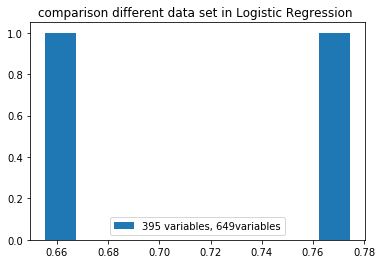

In [7]:
import matplotlib.pyplot as plt
plt.hist([A , B])
legend=['395 variables, 649variables']
plt.title("comparison different data set in Logistic Regression ")
plt.legend(legend)
plt.show()

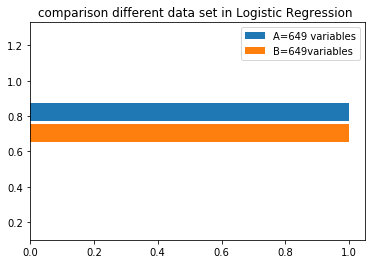

In [8]:
plt.hist(A, orientation="horizontal" )
plt.hist(B, orientation="horizontal" )
legend=['A=649 variables', 'B=649variables']
plt.title("comparison different data set in Logistic Regression ")
plt.legend(legend)
plt.show()